<a href="https://colab.research.google.com/github/nikimajidifard/resource-management-in-cloud-computing-based-on-predictive-resource-scaling/blob/main/resource_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import math
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics, preprocessing
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

#Load Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data from google drive
data = pd.read_csv('/content/drive/My Drive/final.csv')

In [ ]:
print("columns: ", data.columns)
print("data shape: ", data.shape)

columns:  Index(['TIME', 'CPU_USAGE', 'REQUESTS', 'AVERAGE_RESPONSE_TIME',
       'MEMORY_USAGE'],
      dtype='object')
data shape:  (10080, 5)


In [ ]:
random_data = data.sample(n=10)
print(random_data)

                     TIME  CPU_USAGE      REQUESTS AVERAGE_RESPONSE_TIME  \
6592  2023-12-22 13:52:00      11.80  200.40 req/s                113 ms   
6235   2023-12-22 7:55:00       7.24  123.65 req/s                114 ms   
6399  2023-12-22 10:39:00      10.70  203.53 req/s                114 ms   
4932  2023-12-21 10:12:00      13.30  283.02 req/s                113 ms   
7253   2023-12-23 0:53:00      15.10  272.98 req/s                124 ms   
7582   2023-12-23 6:22:00       5.88  104.48 req/s                121 ms   
7323   2023-12-23 2:03:00      11.60  233.70 req/s                123 ms   
7737   2023-12-23 8:57:00      10.70  184.95 req/s                121 ms   
3353   2023-12-20 7:53:00       8.58  151.80 req/s                112 ms   
414    2023-12-18 6:54:00       6.00  102.70 req/s                102 ms   

     MEMORY_USAGE  
6592     19.7 GiB  
6235     18.1 GiB  
6399     19.5 GiB  
4932     17.9 GiB  
7253     19.4 GiB  
7582     17.7 GiB  
7323     19.0 GiB  
773

# Data Preprocessing

Extract Times in Hours

In [ ]:
timestamps = data['TIME'].astype(str)

times = []
for timestamp in timestamps:
  timestamp = timestamp.split(" ")[1]
  hour= timestamp.split(":")[0]
  times.append(hour)

times = [float(x) for x in times]

In [ ]:
print("extracted hours: ", times)

extracted hours:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3

Exract CPU_Percentage

In [ ]:
CPU_Usage = data['CPU_USAGE'].astype(str)
CPU_Usage = [float(x) for x in CPU_Usage]

In [ ]:
print("cpu usage data: ", CPU_Usage)

cpu usage data:  [16.3, 13.7, 14.3, 14.0, 15.4, 14.2, 14.9, 13.4, 12.6, 12.8, 12.7, 13.9, 13.5, 13.1, 14.7, 13.0, 13.9, 12.7, 12.6, 12.6, 12.4, 12.4, 12.4, 13.1, 12.5, 13.9, 11.8, 15.4, 12.4, 13.4, 11.7, 11.9, 13.3, 11.5, 12.1, 12.3, 11.9, 11.7, 11.4, 12.0, 11.9, 12.3, 15.7, 14.5, 13.4, 12.1, 10.9, 12.2, 11.3, 11.2, 10.3, 10.4, 10.8, 11.2, 14.6, 11.0, 11.1, 10.9, 11.9, 10.7, 10.9, 15.5, 12.8, 10.3, 10.2, 10.2, 9.97, 9.66, 9.51, 9.91, 9.77, 9.52, 10.1, 9.69, 9.87, 10.4, 10.1, 9.9, 9.58, 9.94, 8.87, 10.9, 10.3, 11.5, 9.88, 10.3, 9.32, 8.92, 8.47, 8.97, 8.79, 8.9, 9.08, 8.76, 9.11, 9.1, 8.81, 9.83, 8.47, 8.81, 8.39, 8.67, 8.64, 12.9, 8.68, 7.93, 8.71, 8.34, 8.85, 9.21, 8.71, 9.04, 8.74, 8.76, 8.49, 9.21, 8.15, 10.1, 9.12, 8.27, 8.5, 8.35, 7.44, 8.01, 7.77, 7.85, 7.95, 8.25, 7.76, 8.82, 7.86, 7.84, 7.42, 7.47, 7.81, 7.63, 7.47, 7.23, 7.95, 9.1, 7.66, 7.56, 7.21, 7.84, 7.33, 7.49, 7.39, 7.62, 7.43, 7.55, 7.41, 7.71, 7.18, 7.01, 7.55, 7.47, 7.6, 7.54, 6.74, 6.69, 7.18, 7.31, 7.49, 6.82, 6.37

#Visualize Data

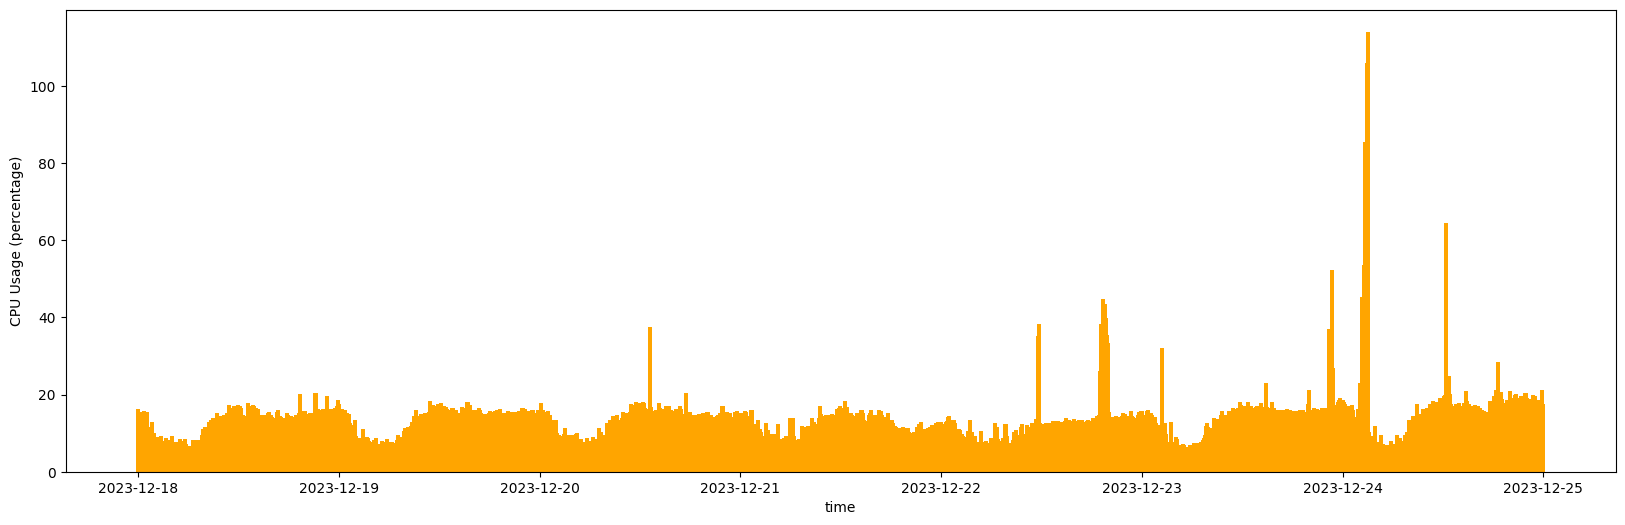

In [ ]:
plt.figure(figsize=(20, 6))
plt.bar(pd.to_datetime(data["TIME"]), CPU_Usage, width=0.02, color='orange')
plt.xlabel('time')
plt.ylabel('CPU Usage (percentage)')
plt.show()
plt.rcdefaults()  # Reset the default settings including figure size

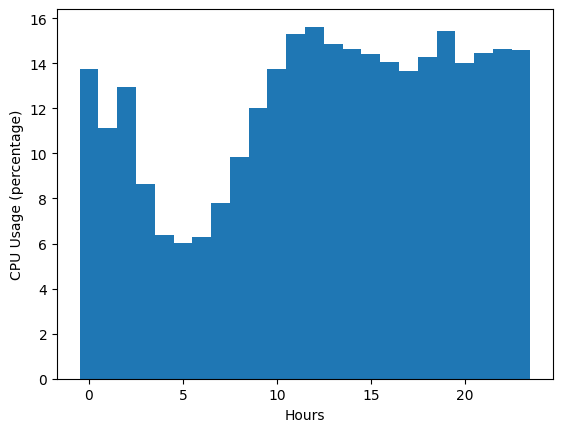

In [ ]:
# Calculate the average CPU usage for each hour
average_usage_dict = {}
for hour, usage in zip(times, CPU_Usage):
    if hour in average_usage_dict:
        average_usage_dict[hour].append(usage)
    else:
        average_usage_dict[hour] = [usage]

average_usage_list = []
for hour, usage_list in average_usage_dict.items():
    average_usage = sum(usage_list) / len(usage_list)
    average_usage_list.append((hour, average_usage))

# Extract hours and average usage from the list of tuples
hours = [hour for hour, usage in average_usage_list]
average_usage = [usage for hour, usage in average_usage_list]

x_axis = hours
y_axis = average_usage
plt.bar(x_axis, y_axis, width=1)
plt.xlabel("Hours")
plt.ylabel("CPU Usage (percentage)")
plt.show()



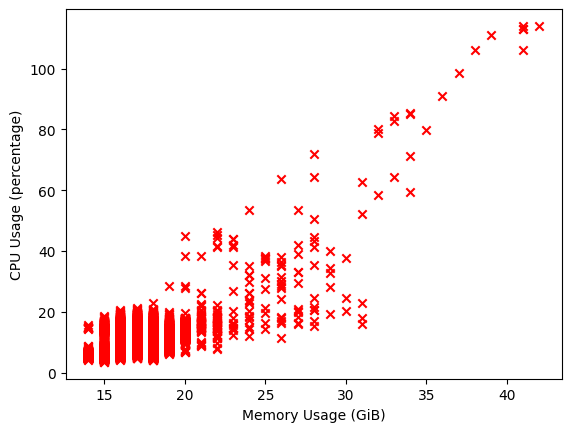

In [ ]:
memory_usages = []
for mem in data['MEMORY_USAGE']:
  mem = round(float(mem.split()[0]))
  memory_usages.append(mem)
plt.scatter(memory_usages, CPU_Usage, color='red', marker='x')
plt.xlabel('Memory Usage (GiB)')
plt.ylabel('CPU Usage (percentage)')
plt.show()

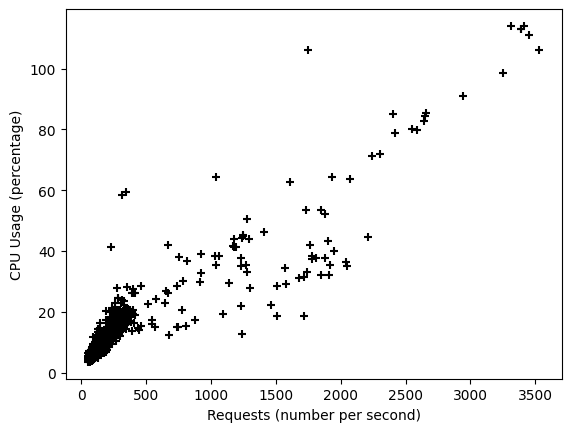

In [ ]:
reqs = []
for req in data['REQUESTS']:
    if 'K' in req:
      req = req.replace('K','')
      reqs.append(float(req.split()[0]) * 1000)
    else:
      reqs.append(float(req.split()[0]))

plt.scatter(reqs, CPU_Usage, marker='+', color='black')
plt.xlabel('Requests (number per second)')
plt.ylabel('CPU Usage (percentage)')
plt.show()

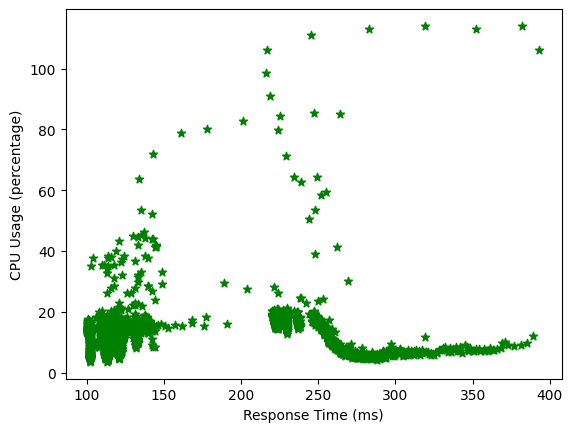

In [ ]:
response_times = []
for res in data['AVERAGE_RESPONSE_TIME']:
  res = float(res.split()[0])
  response_times.append(res)
plt.scatter(response_times, CPU_Usage, marker='*', color='green')
plt.xlabel('Response Time (ms)')
plt.ylabel('CPU Usage (percentage)')
plt.show()

#Markov

In [ ]:
states_dict = {"idle":[], "low":[], "high":[]}
for use in CPU_Usage:
  if use < 6:
    states_dict["idle"].append(use)
  elif 6 <= use < 10 :
    states_dict["low"].append(use)
  else:
    states_dict["high"].append(use)

print(states_dict)

{'idle': [5.78, 5.82, 5.98, 5.92, 5.96, 5.69, 5.61, 5.94, 5.89, 5.94, 5.58, 5.99, 5.74, 5.72, 5.99, 5.75, 5.79, 5.6, 5.73, 5.33, 5.32, 5.38, 5.16, 5.96, 5.29, 5.81, 5.34, 5.3, 5.61, 5.42, 5.12, 5.38, 5.02, 5.2, 4.87, 5.49, 4.84, 5.55, 5.43, 5.83, 5.21, 5.25, 5.01, 5.01, 5.19, 5.78, 4.64, 4.68, 5.32, 5.69, 4.89, 4.76, 4.87, 4.58, 4.73, 4.42, 5.28, 4.86, 4.98, 4.73, 4.82, 4.27, 4.59, 5.04, 5.32, 5.01, 4.71, 5.25, 5.13, 5.72, 5.73, 5.05, 5.17, 5.56, 5.42, 5.2, 4.89, 5.09, 5.21, 4.73, 4.65, 5.01, 5.25, 5.0, 5.33, 5.05, 4.78, 5.33, 4.69, 5.84, 5.8, 5.93, 5.37, 5.18, 5.55, 5.33, 5.24, 5.73, 5.0, 4.49, 4.54, 4.35, 5.84, 3.95, 5.62, 4.28, 4.69, 5.54, 5.25, 5.2, 4.17, 4.68, 4.06, 4.33, 4.27, 3.59, 4.81, 4.11, 4.56, 4.83, 4.54, 5.47, 4.39, 4.55, 4.91, 4.45, 5.41, 4.24, 5.61, 4.41, 4.93, 4.79, 5.3, 4.61, 5.97, 5.41, 5.07, 4.6, 4.48, 4.62, 4.71, 4.2, 5.21, 4.52, 4.62, 5.17, 4.65, 5.13, 4.81, 4.5, 4.6, 4.85, 4.89, 4.93, 4.93, 5.08, 5.71, 4.96, 4.91, 5.65, 5.66, 5.09, 4.99, 5.74, 5.52, 5.86, 5.4, 5.

In [ ]:
train_CPU_Usage = CPU_Usage[0:9000]
test_CPU_Usage = CPU_Usage[9000:]

states_dict = {"idle":{"idle":[0], "low":[0], "high":[0]}, "low":{"idle":[0], "low":[0], "high":[0]}, "high":{"idle":[0], "low":[0], "high":[0]}}
converted_to_states = []
idle_count, low_count, high_count = 0, 0, 0

for i in CPU_Usage:
  if i < 6 :
    converted_to_states.append("idle")
  elif i <= 10:
    converted_to_states.append("low")
  else:
    converted_to_states.append("high")


for i in range(len(train_CPU_Usage) - 1):
    current_usage = train_CPU_Usage[i]
    next_usage = train_CPU_Usage[i + 1]

    if current_usage < 6:
        usage_category = "idle"
        idle_count += 1

    elif 6 <= current_usage <= 10:
        usage_category = "low"
        low_count += 1

    else:
        usage_category = "high"
        high_count += 1

    if next_usage < 6:
        states_dict[usage_category]["idle"][0] += 1
    elif 6 <= next_usage <= 10:
        states_dict[usage_category]["low"][0] += 1
    else:
        states_dict[usage_category]["high"][0] += 1

def get_total_state_count(state):
    if state == "idle":
        return idle_count
    elif state == "low":
        return low_count
    else:
        return high_count

for state in states_dict:
  for next_state in states_dict[state]:
      states_dict[state][next_state].append(states_dict[state][next_state][0] / get_total_state_count(state))

print(states_dict)

{'idle': {'idle': [438, 0.6469719350073855], 'low': [238, 0.3515509601181684], 'high': [1, 0.0014771048744460858]}, 'low': {'idle': [239, 0.11321648507816201], 'low': [1683, 0.7972524869729986], 'high': [189, 0.08953102794883941]}, 'high': {'idle': [1, 0.00016100466913540493], 'low': [190, 0.030590887135726937], 'high': [6020, 0.9692481081951376]}}


In [ ]:
test_converted_to_states = converted_to_states[9000:]

def predict_future_states(current_state, states_dict):
    next_states =[]
    total_weight = 0
    for key, value in states_dict[current_state].items():
        total_weight += value[1]
        next_states.append([value[1],key])

    random_number = random.random()
    next_states.sort(key = lambda x : x[0])
    if random_number <= (next_states[0][0]) / total_weight:
        return next_states[0]
    elif random_number <= ((next_states[1][0]) / total_weight):
        return next_states[1]
    else:
        return next_states[2]

#dependent to previous state
def fpredicted_states_dep():
  predicted_states_dep =[]
  for i in range(len(test_CPU_Usage)):
    if i == 0:
      current_state = test_converted_to_states[0]
    else:
        current_state = predicted_state[1]
    predicted_state = predict_future_states(current_state, states_dict)
    predicted_states_dep.append(predicted_state[1])
  k = 0
  for i in range(len(test_converted_to_states)):
    if predicted_states_dep[i] == test_converted_to_states[i] :
      k += 1
  approximation_error_dep = k / len(predicted_states_dep)
  return (approximation_error_dep)


#independent to previous state
def fpredicted_states_indep():
  predicted_states_indep = []
  for i in test_converted_to_states:
    predicted_states_indep.append(predict_future_states(i,states_dict)[1])
  p = 0
  for i in range(len(test_converted_to_states)):
    if predicted_states_indep[i] == test_converted_to_states[i] :
      p += 1
  approximation_error_indep = p / len(predicted_states_indep)
  return (approximation_error_indep)

print(fpredicted_states_dep())
print(fpredicted_states_indep())
######

0.7194444444444444
0.9518518518518518


In [ ]:
raw_data = data.to_numpy()

main_data = []
for row in raw_data:
  is_nan = False
  for feature in row:
    if pd.isna(feature):
      is_nan = True
      break
  if not is_nan:
    main_data.append(row)

big_data = np.array(main_data)
print(big_data)
## har koddom

[['2023-12-18 0:00:00' 16.3 '301.78 req/s' '103 ms' '17.6 GiB']
 ['2023-12-18 0:01:00' 13.7 '243.00 req/s' '103 ms' '16.8 GiB']
 ['2023-12-18 0:02:00' 14.3 '292.67 req/s' '103 ms' '17.3 GiB']
 ...
 ['2023-12-24 23:57:00' 16.8 '288.97 req/s' '223 ms' '16.8 GiB']
 ['2023-12-24 23:58:00' 16.6 '326.60 req/s' '223 ms' '17.3 GiB']
 ['2023-12-24 23:59:00' 16.0 '263.30 req/s' '223 ms' '17.0 GiB']]


In [ ]:
def get_first_part(element):
    if 'K' in element:
      element = element.replace('K', '')
      return float(element.split()[0]) * 1000
    else:
      return float(element.split()[0])

requests = np.vectorize(get_first_part)(big_data[:,2:3])
responses = np.vectorize(get_first_part)(big_data[:,3:4])
mems = np.vectorize(get_first_part)(big_data[:,4:5])
ntimes= np.array(times).reshape(-1, 1)
X = np.hstack((ntimes,requests,responses, mems))
Y = big_data[:,1]


In [ ]:
print(X[:4])

[[  0.   301.78 103.    17.6 ]
 [  0.   243.   103.    16.8 ]
 [  0.   292.67 103.    17.3 ]
 [  0.   241.53 103.    16.9 ]]


#Linear Regression

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
X_train, X_test, Y_train, Y_test = X[:9000], X[9000:], Y[:9000], Y[9000:]

model = LinearRegression()

model.fit(X_train, Y_train)

predicted_cpu_usage = model.predict(X_test)

mse = metrics.mean_squared_error(Y_test, predicted_cpu_usage)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) Score
r2 = metrics.r2_score(Y_test, predicted_cpu_usage)
print("R-squared (R2) Score:", r2)

# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(Y_test, predicted_cpu_usage)
print("Mean Absolute Error (MAE):", mae)

print('Coefficients:', model.coef_)
# print('Intercept:', model.intercept_)


print(Y_test)
print(predicted_cpu_usage)

Mean Squared Error (MSE): 7.776419111170945
Root Mean Squared Error (RMSE): 2.7886231568949835
R-squared (R2) Score: 0.6114293806365627
Mean Absolute Error (MAE): 1.8060569498391845
Coefficients: [0.13935418 0.02701723 0.00492127 0.22082451]
[4.73 6.58 5.12 ... 16.8 16.6 16.0]
[ 7.29866248  7.55124051  7.60646045 ... 15.93100837 17.05807914
 15.28164089]


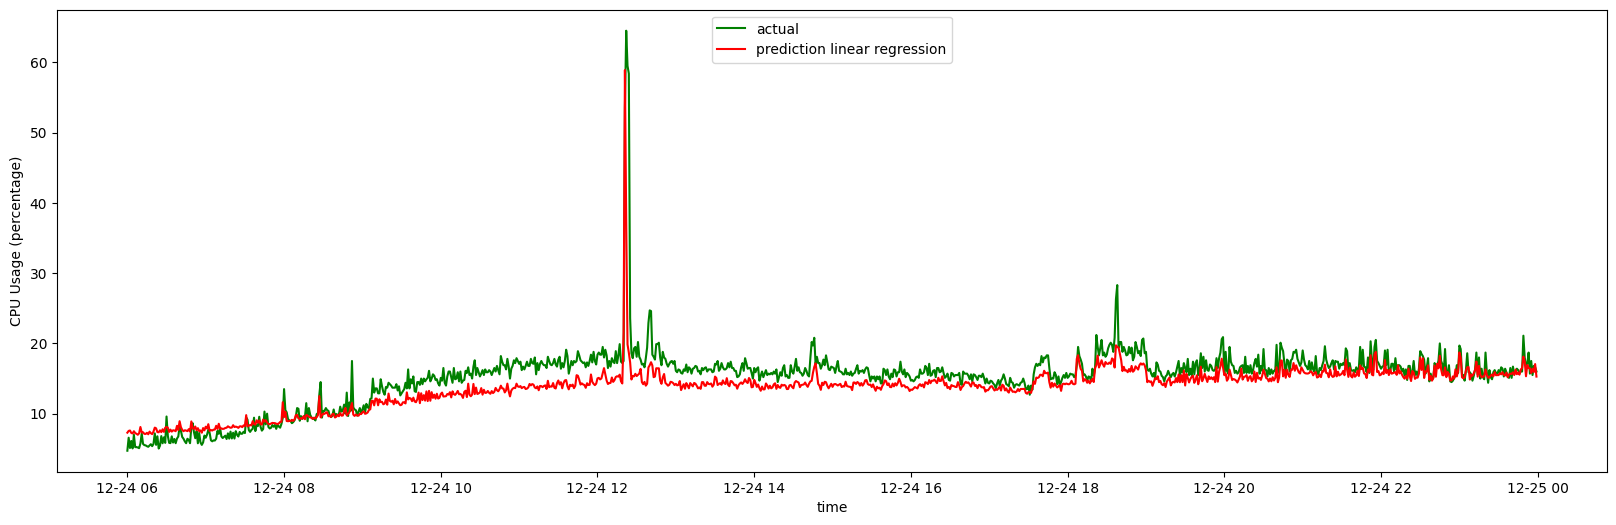

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(pd.to_datetime(data["TIME"])[9000:], Y_test, color='green', label='actual')
plt.plot(pd.to_datetime(data["TIME"])[9000:], predicted_cpu_usage, color='red', label='prediction linear regression')
plt.xlabel('time')
plt.ylabel('CPU Usage (percentage)')
plt.legend(loc='upper center')
plt.show()
plt.rcdefaults()  # Reset the default settings including figure size

#Linear Regression with normalization

In [ ]:
scaler = preprocessing.StandardScaler()
normalized_X = scaler.fit_transform(X)

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
X_train, X_test, Y_train, Y_test = normalized_X[:9000], normalized_X[9000:], Y[:9000], Y[9000:]

model = LinearRegression()

model.fit(X_train, Y_train)

predicted_cpu_usage = model.predict(X_test)

mse = metrics.mean_squared_error(Y_test, predicted_cpu_usage)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) Score
r2 = metrics.r2_score(Y_test, predicted_cpu_usage)
print("R-squared (R2) Score:", r2)

# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(Y_test, predicted_cpu_usage)
print("Mean Absolute Error (MAE):", mae)

print('Coefficients:', model.coef_)
# print('Intercept:', model.intercept_)


print(Y_test)
print(predicted_cpu_usage)

Mean Squared Error (MSE): 7.77641911117092
Root Mean Squared Error (RMSE): 2.788623156894979
R-squared (R2) Score: 0.6114293806365638
Mean Absolute Error (MAE): 1.8060569498391783
Coefficients: [0.96463566 4.46399685 0.2295635  0.44094945]
[4.73 6.58 5.12 ... 16.8 16.6 16.0]
[ 7.29866248  7.55124051  7.60646045 ... 15.93100837 17.05807914
 15.28164089]


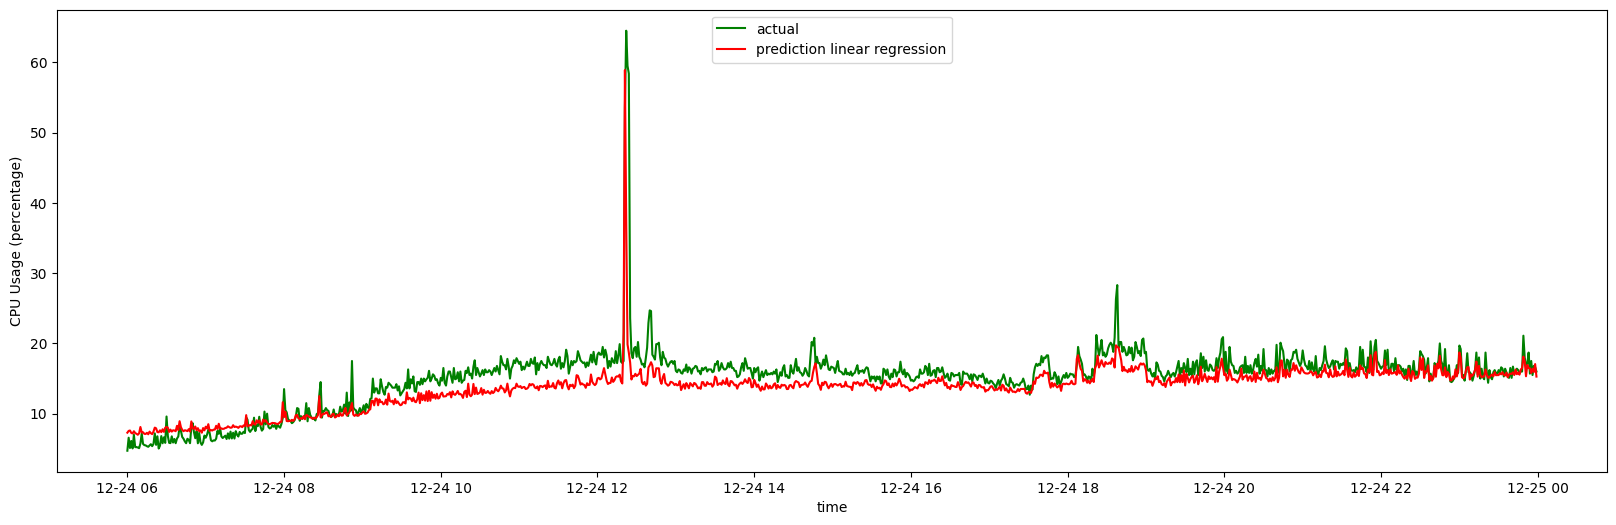

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(pd.to_datetime(data["TIME"])[9000:], Y_test, color='green', label='actual')
plt.plot(pd.to_datetime(data["TIME"])[9000:], predicted_cpu_usage, color='red', label='prediction linear regression')
plt.xlabel('time')
plt.ylabel('CPU Usage (percentage)')
plt.legend(loc='upper center')
plt.show()
plt.rcdefaults()  # Reset the default settings including figure size

#Linear Regression with Markov Probabilities

In [ ]:
X1 = []
X2 = []
X3 = []
idle_probabilities = [states_dict['idle']['idle'][1], states_dict['idle']['low'][1], states_dict['idle']['high'][1]]
low_probabilities = [states_dict['low']['idle'][1], states_dict['low']['low'][1], states_dict['low']['high'][1]]
high_probabilities = [states_dict['high']['idle'][1], states_dict['high']['low'][1], states_dict['high']['high'][1]]
for i in range(Y.shape[0]):
  if Y[i] <= 6:
    X1.append(idle_probabilities[0])
    X2.append(idle_probabilities[1])
    X3.append(idle_probabilities[2])
  elif Y[i] <= 10:
    X1.append(low_probabilities[0])
    X2.append(low_probabilities[1])
    X3.append(low_probabilities[2])
  else:
    X1.append(high_probabilities[0])
    X2.append(high_probabilities[1])
    X3.append(high_probabilities[2])

X1 = np.array(X1).reshape(-1, 1)
X2 = np.array(X2).reshape(-1, 1)
X3 = np.array(X3).reshape(-1, 1)

In [ ]:
X_with_markov = X = np.hstack((ntimes,requests,responses, mems, X1, X2, X3))

In [ ]:
X_train, X_test, Y_train, Y_test = X_with_markov[:9000], X_with_markov[9000:], Y[:9000], Y[9000:]

model = LinearRegression()

model.fit(X_train, Y_train)

predicted_cpu_usage = model.predict(X_test)

mse = metrics.mean_squared_error(Y_test, predicted_cpu_usage)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) Score
r2 = metrics.r2_score(Y_test, predicted_cpu_usage)
print("R-squared (R2) Score:", r2)

# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(Y_test, predicted_cpu_usage)
print("Mean Absolute Error (MAE):", mae)

print('Coefficients:', model.coef_)
# print('Intercept:', model.intercept_)


print(Y_test)
print(predicted_cpu_usage)

Mean Squared Error (MSE): 5.134898891605646
Root Mean Squared Error (RMSE): 2.2660315292611544
R-squared (R2) Score: 0.7434203565734263
Mean Absolute Error (MAE): 1.007144509492097
Coefficients: [ 3.55958146e-02  2.48147835e-02  1.12768540e-02  1.39409957e-01
 -4.92371749e+09 -4.92371748e+09 -4.92371748e+09]
[4.73 6.58 5.12 ... 16.8 16.6 16.0]
[ 6.27287197  7.74854851  6.56191921 ... 16.26425552 17.2677412
 15.65514183]


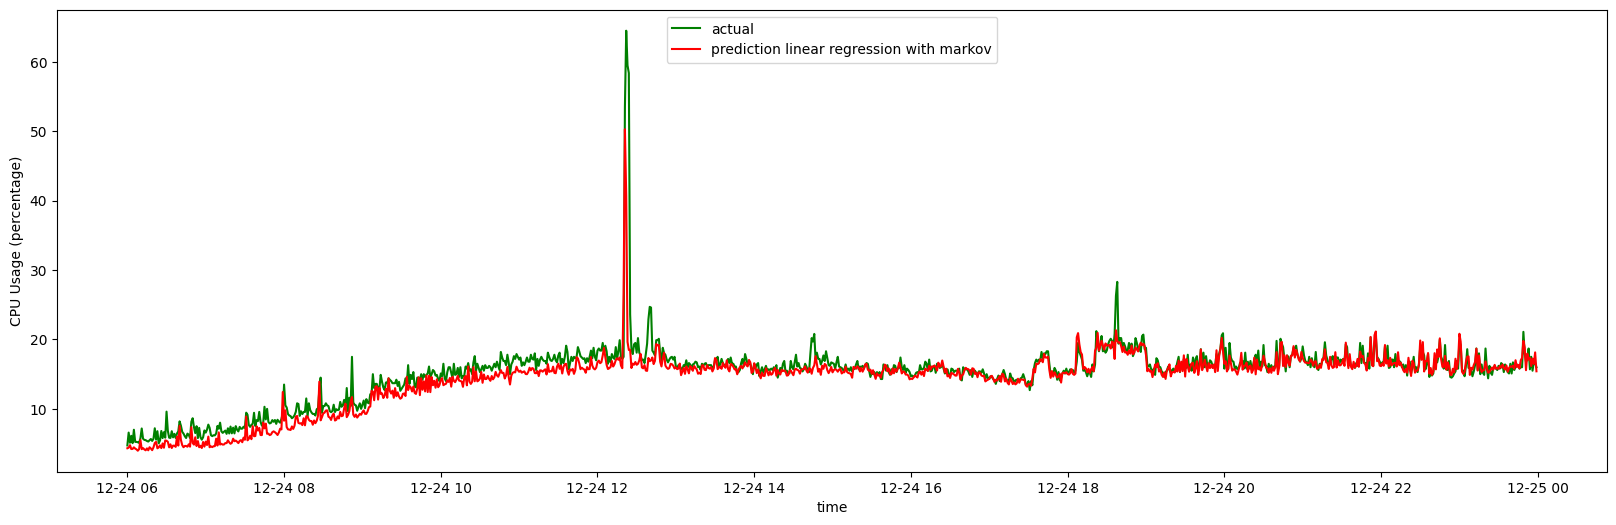

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(pd.to_datetime(data["TIME"])[9000:], Y_test, color='green', label='actual')
plt.plot(pd.to_datetime(data["TIME"])[9000:], predicted_cpu_usage, color='red', label='prediction linear regression with markov')
plt.xlabel('time')
plt.ylabel('CPU Usage (percentage)')
plt.legend(loc='upper center')
plt.show()
plt.rcdefaults()  # Reset the default settings including figure size

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

# X_train, X_test, Y_train, Y_test = train_test_split(x_poly,Y, test_size = 0.2)
X_train, X_test, Y_train, Y_test =x_poly[:9000], x_poly[9000:], Y[:9000], Y[9000:]


model = LinearRegression()

model.fit(X_train, Y_train)

predicted_cpu_usage = model.predict(X_test)

mse = metrics.mean_squared_error(Y_test, predicted_cpu_usage)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) Score
r2 = metrics.r2_score(Y_test, predicted_cpu_usage)
print("R-squared (R2) Score:", r2)

# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(Y_test, predicted_cpu_usage)
print("Mean Absolute Error (MAE):", mae)

print('Coefficients:', model.coef_)
# print('Intercept:', model.intercept_)


print(Y_test)
print(predicted_cpu_usage)


Mean Squared Error (MSE): 3.5773085475867554
Root Mean Squared Error (RMSE): 1.8913774207140033
R-squared (R2) Score: 0.8212497322844785
Mean Absolute Error (MAE): 1.0847248654005766
Coefficients: [ 0.00000000e+00  6.60777342e-01  3.41110403e-02  1.25129592e-02
 -1.49035913e+00  7.64837033e-04 -8.65882282e-04  7.35256122e-04
 -2.63269447e-02 -1.29911774e-05  2.31639216e-05  6.98860786e-04
 -1.12785426e-05 -6.66900344e-04  5.02347223e-02]
[4.73 6.58 5.12 ... 16.8 16.6 16.0]
[ 6.4976701   6.39129749  7.06171066 ... 17.71553343 18.43330869
 17.02878304]


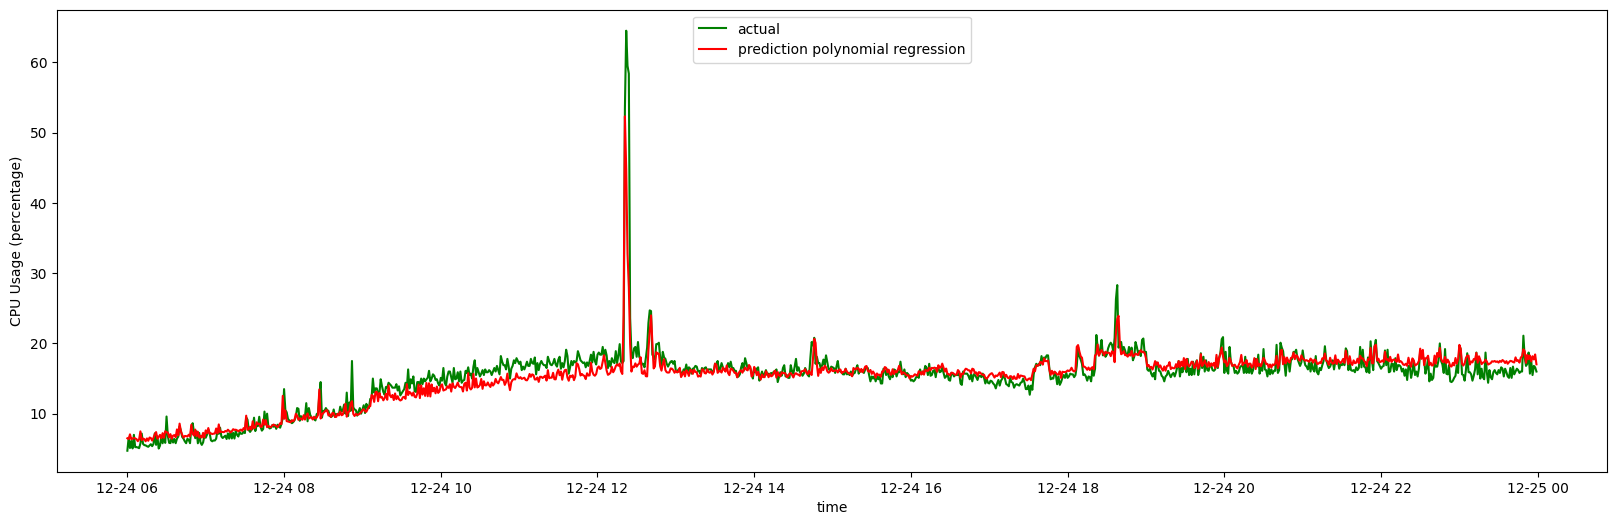

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(pd.to_datetime(data["TIME"])[9000:], Y_test, color='green', label='actual')
plt.plot(pd.to_datetime(data["TIME"])[9000:], predicted_cpu_usage, color='red', label='prediction polynomial regression')
plt.xlabel('time')
plt.ylabel('CPU Usage (percentage)')
plt.legend(loc='upper center')
plt.show()
plt.rcdefaults()  # Reset the default settings including figure size

#Polynomial Regression with normalization

In [ ]:
scaler = preprocessing.StandardScaler()
normalized_X = scaler.fit_transform(X)

In [ ]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(normalized_X)

# X_train, X_test, Y_train, Y_test = train_test_split(x_poly,Y, test_size = 0.2)
X_train, X_test, Y_train, Y_test =x_poly[:9000], x_poly[9000:], Y[:9000], Y[9000:]


model = LinearRegression()

model.fit(X_train, Y_train)

predicted_cpu_usage = model.predict(X_test)

mse = metrics.mean_squared_error(Y_test, predicted_cpu_usage)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) Score
r2 = metrics.r2_score(Y_test, predicted_cpu_usage)
print("R-squared (R2) Score:", r2)

# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(Y_test, predicted_cpu_usage)
print("Mean Absolute Error (MAE):", mae)

print('Coefficients:', model.coef_)
# print('Intercept:', model.intercept_)


print(Y_test)
print(predicted_cpu_usage)

Mean Squared Error (MSE): 3.5773085475525006
Root Mean Squared Error (RMSE): 1.8913774207049476
R-squared (R2) Score: 0.8212497322861901
Mean Absolute Error (MAE): 1.0847248653924972
Coefficients: [ 0.          0.82237987  5.56026294  0.53552701  0.07998737  0.03664844
 -0.99034189  0.23741461 -0.36390271 -0.35466188  0.17853385  0.23057658
 -0.02454166 -0.0621195   0.20030282]
[4.73 6.58 5.12 ... 16.8 16.6 16.0]
[ 6.4976701   6.39129749  7.06171066 ... 17.71553343 18.43330869
 17.02878304]


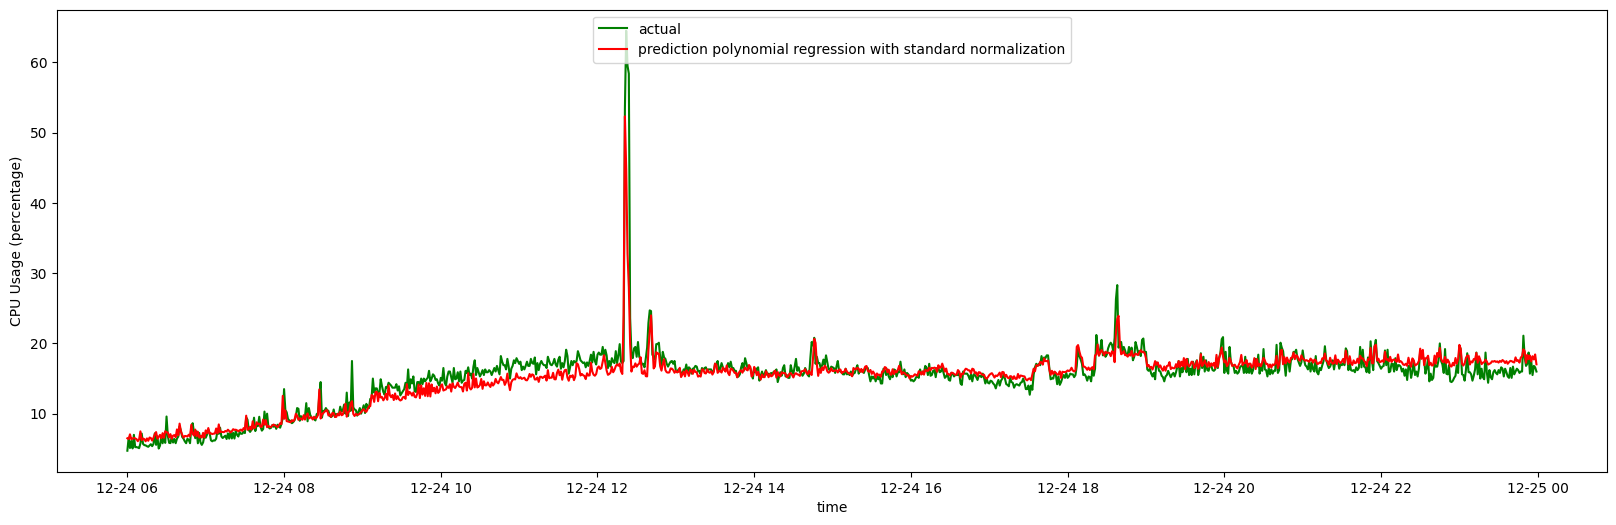

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(pd.to_datetime(data["TIME"])[9000:], Y_test, color='green', label='actual')
plt.plot(pd.to_datetime(data["TIME"])[9000:], predicted_cpu_usage, color='red', label='prediction polynomial regression with standard normalization')
plt.xlabel('time')
plt.ylabel('CPU Usage (percentage)')
plt.legend(loc='upper center')
plt.show()
plt.rcdefaults()  # Reset the default settings including figure size

#Polynomial Regression with Markov Probabilities

In [ ]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)
x_poly_with_markov = np.hstack((x_poly, X1, X2, X3))

# X_train, X_test, Y_train, Y_test = train_test_split(x_poly,Y, test_size = 0.2)
X_train, X_test, Y_train, Y_test =x_poly_with_markov[:9000], x_poly_with_markov[9000:], Y[:9000], Y[9000:]


model = LinearRegression()

model.fit(X_train, Y_train)

predicted_cpu_usage = model.predict(X_test)

mse = metrics.mean_squared_error(Y_test, predicted_cpu_usage)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) Score
r2 = metrics.r2_score(Y_test, predicted_cpu_usage)
print("R-squared (R2) Score:", r2)

# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(Y_test, predicted_cpu_usage)
print("Mean Absolute Error (MAE):", mae)

print('Coefficients:', model.coef_)
# print('Intercept:', model.intercept_)


print(Y_test)
print(predicted_cpu_usage)

Mean Squared Error (MSE): 4.256182849442088
Root Mean Squared Error (RMSE): 2.0630518290731543
R-squared (R2) Score: 0.7873278713134169
Mean Absolute Error (MAE): 1.3634070819551265
Coefficients: [ 2.54510308e-11  2.35796623e-01  1.51536236e-02  1.28444061e-02
 -1.52058123e+00 -3.38955041e-01 -9.44298775e-01  1.28325382e+00
 -1.14445472e-03 -7.14530732e-04  8.26926985e-04 -1.37241704e-02
 -3.23842466e-02  1.12553114e-01  1.55627756e-01 -9.80661953e-06
 -2.19453711e-06  8.48117428e-04 -8.30120634e-03  1.49941919e-02
  8.46063804e-03 -3.84705450e-05  6.87646149e-05 -2.94033143e-03
  3.81432006e-03  1.19704175e-02  5.87750296e-02 -4.05316933e-01
 -4.23272884e-01 -6.91991414e-01 -1.53438926e-01 -1.74348837e-01
 -1.11672780e-02 -7.34076592e-01 -3.58733461e-02  1.33029444e+00
 -3.38955041e-01 -9.44298775e-01  1.28325382e+00]
[4.73 6.58 5.12 ... 16.8 16.6 16.0]
[ 5.53957714  6.90354271  5.81967518 ... 18.29306943 18.74956368
 17.83058456]


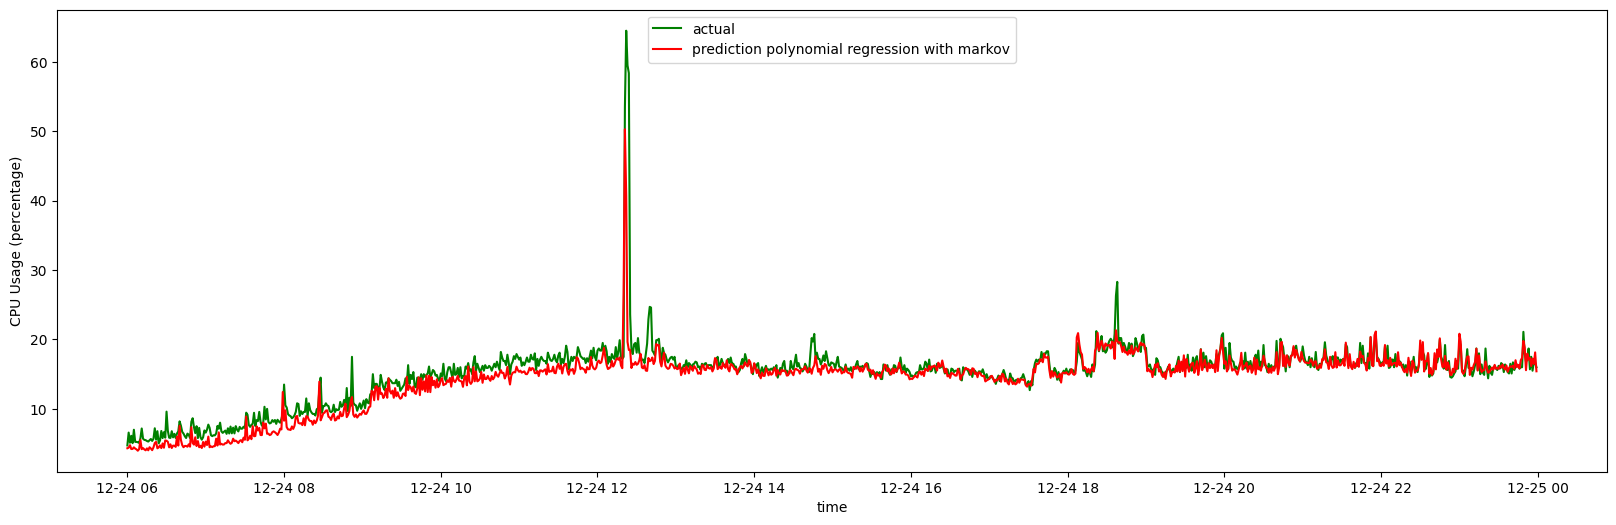

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(pd.to_datetime(data["TIME"])[9000:], Y_test, color='green', label='actual')
plt.plot(pd.to_datetime(data["TIME"])[9000:], predicted_cpu_usage, color='red', label='prediction polynomial regression with markov')
plt.xlabel('time')
plt.ylabel('CPU Usage (percentage)')
plt.legend(loc='upper center')
plt.show()
plt.rcdefaults()  # Reset the default settings including figure size

#Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(x_poly,Y, test_size = 0.2)
X_train, X_test, Y_train, Y_test =X[:9000], X[9000:], Y[:9000], Y[9000:]

# Build the neural network model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Define a ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint("best_model.h5", monitor='loss', save_best_only=True, mode='min', verbose=1)

# Compile the model
# custom_optimizer = SGD(lr=0.001)
# model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model.compile(optimizer=Adam(0.01), loss='mean_squared_error')

model.summary()

# Train the model
model.fit(X_train.astype('float32'), Y_train.astype('float32'), epochs=128, batch_size=64, shuffle=True, verbose=1, callbacks=[checkpoint])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               640       
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8961 (35.00 KB)
Trainable params: 8961 (35.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/128
136/141 [===========================>..] - ETA: 0s - loss: 158.8513
Epoch 1: loss improved from inf to 153.67081, saving model to best_model.h5
141/141 [==============================] - 1s 2ms/step - loss: 153.6708
Epoch 2/128
 97/141 [===================>..........] - E

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


126/141 [=========================>....] - ETA: 0s - loss: 2.9012
Epoch 2: loss improved from 153.67081 to 2.97748, saving model to best_model.h5
141/141 [==============================] - 0s 2ms/step - loss: 2.9775
Epoch 3/128
125/141 [=========================>....] - ETA: 0s - loss: 2.9106
Epoch 3: loss improved from 2.97748 to 2.90847, saving model to best_model.h5
141/141 [==============================] - 0s 2ms/step - loss: 2.9085
Epoch 4/128
117/141 [=======================>......] - ETA: 0s - loss: 3.0114
Epoch 4: loss did not improve from 2.90847
141/141 [==============================] - 0s 2ms/step - loss: 3.1372
Epoch 5/128
122/141 [========================>.....] - ETA: 0s - loss: 3.3204
Epoch 5: loss did not improve from 2.90847
141/141 [==============================] - 0s 2ms/step - loss: 3.3091
Epoch 6/128
129/141 [==========================>...] - ETA: 0s - loss: 2.7726
Epoch 6: loss improved from 2.90847 to 2.81731, saving model to best_model.h5
141/141 [===========

In [ ]:
best_model = load_model("best_model.h5")

predicted_cpu_usage = best_model.predict(X_test.astype('float32'))


mse = metrics.mean_squared_error(Y_test, predicted_cpu_usage)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) Score
r2 = metrics.r2_score(Y_test, predicted_cpu_usage)
print("R-squared (R2) Score:", r2)


# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(Y_test, predicted_cpu_usage)
print("Mean Absolute Error (MAE):", mae)


print(Y_test[:8])
print(predicted_cpu_usage[:8])

34/34 [==============================] - 1s 884us/step
Mean Squared Error (MSE): 4.89989737487762
Root Mean Squared Error (RMSE): 2.2135711813442143
R-squared (R2) Score: 0.7551628673101717
Mean Absolute Error (MAE): 0.9978472035725912
[4.73 6.58 5.12 6.12 5.06 6.99 5.24 5.24]
[[6.025126 ]
 [6.1892834]
 [6.6021194]
 [5.9271417]
 [5.8966804]
 [6.242535 ]
 [5.95388  ]
 [5.8144994]]


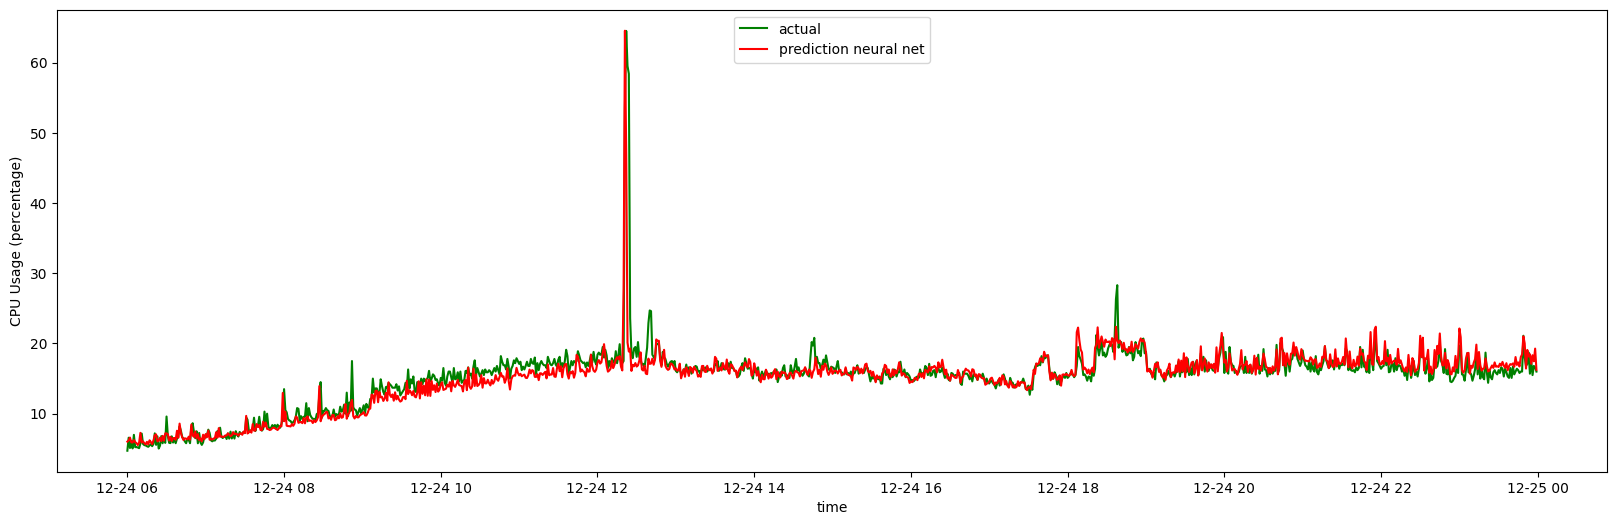

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(pd.to_datetime(data["TIME"])[9000:], Y_test, color='green', label='actual')
plt.plot(pd.to_datetime(data["TIME"])[9000:], predicted_cpu_usage, color='red', label='prediction neural net')
plt.xlabel('time')
plt.ylabel('CPU Usage (percentage)')
plt.legend(loc='upper center')
plt.show()
plt.rcdefaults()  # Reset the default settings including figure size

#Neural Net with normalization

In [ ]:
scaler = preprocessing.MinMaxScaler()
normalized_X = scaler.fit_transform(X)

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(x_poly,Y, test_size = 0.2)
X_train, X_test, Y_train, Y_test = normalized_X[:9000], normalized_X[9000:], Y[:9000], Y[9000:]

# Build the neural network model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Define a ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint("best_normalized_model.h5", monitor='loss', save_best_only=True, mode='min', verbose=1)

# Compile the model
# custom_optimizer = SGD(lr=0.001)
# model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model.compile(optimizer=Adam(0.001), loss='mean_squared_error')

model.summary()

# Train the model
model.fit(X_train.astype('float32'), Y_train.astype('float32'), epochs=128, batch_size=64, shuffle=True, validation_split=0.1 ,verbose=1, callbacks=[checkpoint])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1024      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
_________________________________________________________________
Epoch 1/128
109/127 [========================>.....] - ETA: 0s - loss: 60.8729
Epoch 1: loss improved from inf to 53.06115, saving model to best_normalized_model.h5
127/127 [==============================] - 1s 4ms/step - loss: 53.0612 - val_loss: 145.0427
Epoch 2/128
126/127 [============================>.] - ETA:

In [ ]:
best_model = load_model("best_normalized_model.h5")

predicted_cpu_usage = best_model.predict(X_test.astype('float32'))


mse = metrics.mean_squared_error(Y_test, predicted_cpu_usage)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) Score
r2 = metrics.r2_score(Y_test, predicted_cpu_usage)
print("R-squared (R2) Score:", r2)


# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(Y_test, predicted_cpu_usage)
print("Mean Absolute Error (MAE):", mae)


print(Y_test[:8])
print(predicted_cpu_usage[:8])

34/34 [==============================] - 1s 10ms/step
Mean Squared Error (MSE): 5.963607786884839
Root Mean Squared Error (RMSE): 2.4420499149044517
R-squared (R2) Score: 0.7020115893623007
Mean Absolute Error (MAE): 1.4986983893005936
[4.73 6.58 5.12 6.12 5.06 6.99 5.24 5.24]
[[3.96433  ]
 [5.687309 ]
 [4.1457705]
 [5.4135528]
 [3.9257338]
 [5.6078925]
 [3.94053  ]
 [3.8979208]]


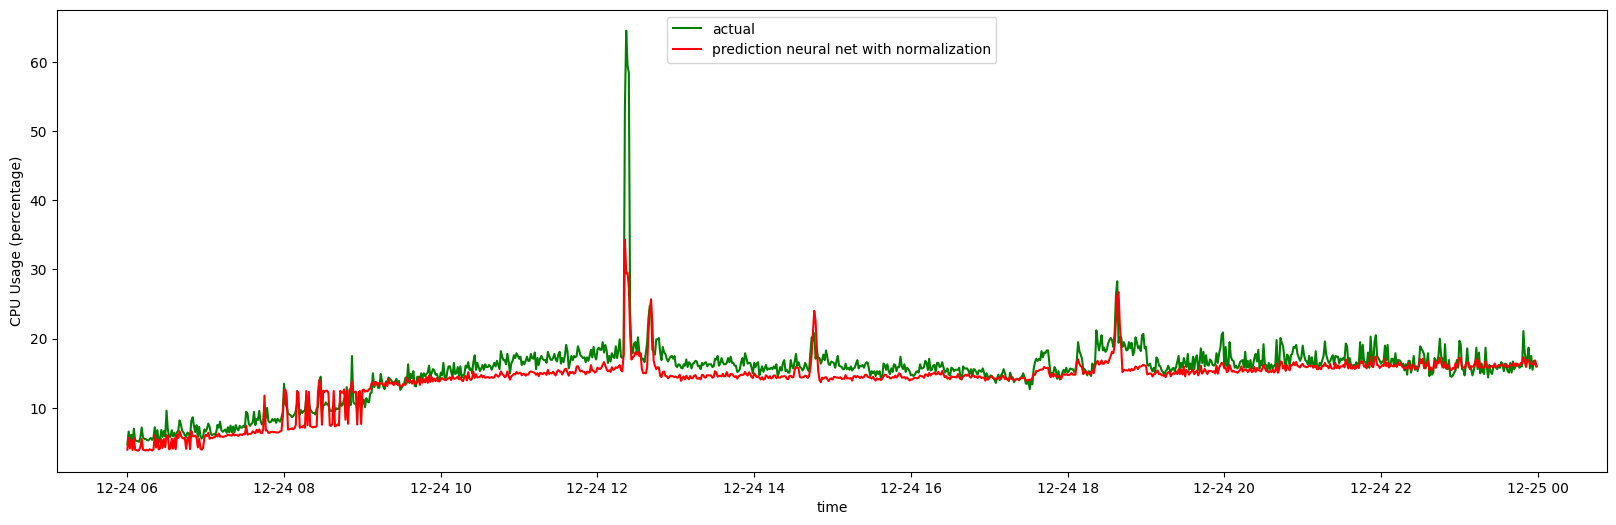

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(pd.to_datetime(data["TIME"])[9000:], Y_test, color='green', label='actual')
plt.plot(pd.to_datetime(data["TIME"])[9000:], predicted_cpu_usage, color='red', label='prediction neural net with normalization')
plt.xlabel('time')
plt.ylabel('CPU Usage (percentage)')
plt.legend(loc='upper center')
plt.show()
plt.rcdefaults()  # Reset the default settings including figure size

#Neural Net with Markov

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(x_poly,Y, test_size = 0.2)
X_train, X_test, Y_train, Y_test = X_with_markov[:9000], X_with_markov[9000:], Y[:9000], Y[9000:]

# Build the neural network model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Define a ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint("best_markov_model.h5", monitor='loss', save_best_only=True, mode='min', verbose=1)

# Compile the model
# custom_optimizer = SGD(lr=0.001)
# model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model.compile(optimizer=Adam(0.001), loss='mean_squared_error')

model.summary()

# Train the model
model.fit(X_train.astype('float32'), Y_train.astype('float32'), epochs=128, batch_size=64, shuffle=True, validation_split=0.1 ,verbose=1, callbacks=[checkpoint])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9345 (36.50 KB)
Trainable params: 9345 (36.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/128
109/127 [========================>.....] - ETA: 0s - loss: 10.1420
Epoch 1: loss improved from inf to 8.92619, saving model to best_markov_model.h5
127/127 [==============================] - 1s 4ms/step - loss: 8.9262 - val_loss: 41.2553
Epoch 2/128
 84/127 [===============

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


108/127 [========================>.....] - ETA: 0s - loss: 1.6040
Epoch 2: loss improved from 8.92619 to 1.74670, saving model to best_markov_model.h5
127/127 [==============================] - 0s 3ms/step - loss: 1.7467 - val_loss: 22.3870
Epoch 3/128
101/127 [======================>.......] - ETA: 0s - loss: 1.3645
Epoch 3: loss improved from 1.74670 to 1.30068, saving model to best_markov_model.h5
127/127 [==============================] - 0s 2ms/step - loss: 1.3007 - val_loss: 33.9823
Epoch 4/128
104/127 [=======================>......] - ETA: 0s - loss: 1.4876
Epoch 4: loss did not improve from 1.30068
127/127 [==============================] - 0s 2ms/step - loss: 1.7555 - val_loss: 145.4326
Epoch 5/128
109/127 [========================>.....] - ETA: 0s - loss: 4.2073
Epoch 5: loss did not improve from 1.30068
127/127 [==============================] - 0s 2ms/step - loss: 3.9003 - val_loss: 70.1782
Epoch 6/128
104/127 [=======================>......] - ETA: 0s - loss: 1.3615
Epoch

In [ ]:
best_model = load_model("best_markov_model.h5")

predicted_cpu_usage = best_model.predict(X_test.astype('float32'))


mse = metrics.mean_squared_error(Y_test, predicted_cpu_usage)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) Score
r2 = metrics.r2_score(Y_test, predicted_cpu_usage)
print("R-squared (R2) Score:", r2)


# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(Y_test, predicted_cpu_usage)
print("Mean Absolute Error (MAE):", mae)


print(Y_test[:8])
print(predicted_cpu_usage[:8])

34/34 [==============================] - 0s 1ms/step
Mean Squared Error (MSE): 5.871649856952249
Root Mean Squared Error (RMSE): 2.4231487484164584
R-squared (R2) Score: 0.7066065255763168
Mean Absolute Error (MAE): 1.100050694377334
[4.73 6.58 5.12 6.12 5.06 6.99 5.24 5.24]
[[7.089318 ]
 [8.378575 ]
 [7.9498444]
 [7.9849854]
 [6.8945694]
 [8.464638 ]
 [6.98039  ]
 [6.7688193]]


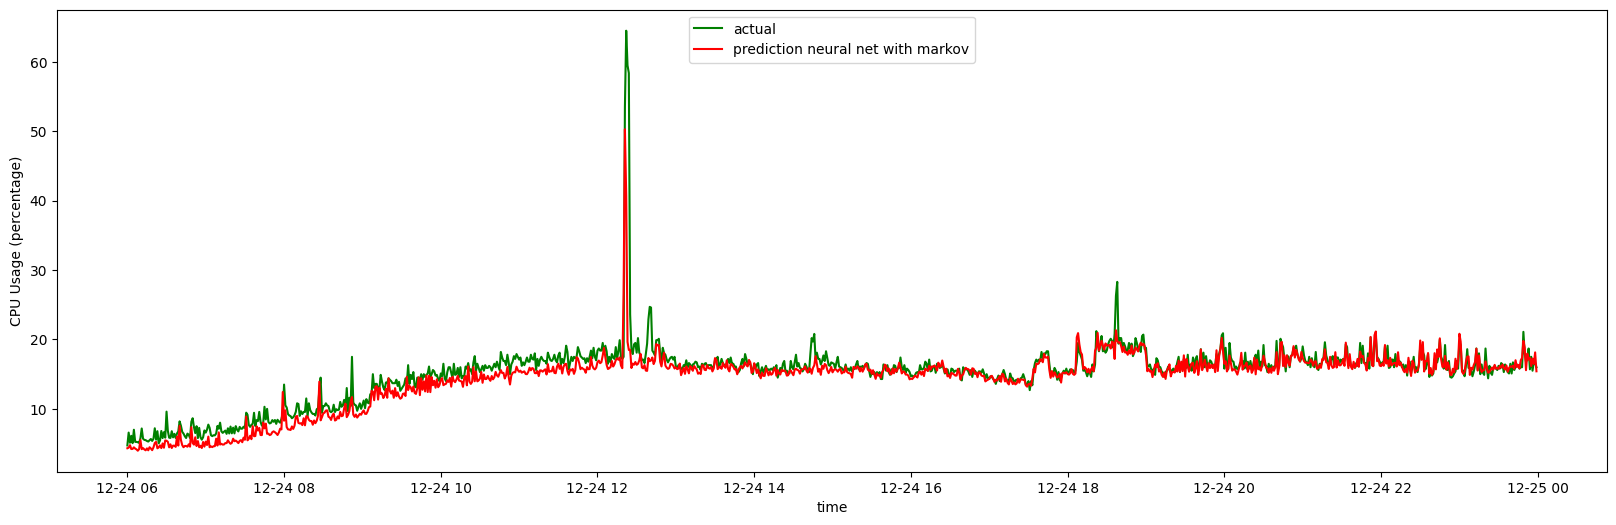

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(pd.to_datetime(data["TIME"])[9000:], Y_test, color='green', label='actual')
plt.plot(pd.to_datetime(data["TIME"])[9000:], predicted_cpu_usage, color='red', label='prediction neural net with markov')
plt.xlabel('time')
plt.ylabel('CPU Usage (percentage)')
plt.legend(loc='upper center')
plt.show()
plt.rcdefaults()  # Reset the default settings including figure size

#RNN Model

In [ ]:
from tensorflow.keras.layers import SimpleRNN

# Assuming x and y are already defined and preprocessed
# x should be shaped as (num_samples, sequence_length, num_features)
# y should be shaped as (num_samples, num_features)

# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
X_train, X_test, Y_train, Y_test =X[:9000], X[9000:], Y[:9000], Y[9000:]

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(32, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(32, activation='relu'))
model.add(Dense(1))

model.summary()

# Define a ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint("best_rnn_model.h5", monitor='loss', save_best_only=True, mode='min', verbose=1)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_train.astype('float32'), Y_train.astype('float32'), epochs=100, batch_size=16, verbose=1, callbacks=[checkpoint])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 4, 32)             1088      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
561/563 [============================>.] - ETA: 0s - loss: 37.7498
Epoch 1: loss improved from inf to 37.65138, saving model to best_rnn_model.h5
563/563 [==============================] - 5s 4ms/step - loss: 37.6514
Epoch 2/100
 76/563 [===>..........................] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


543/563 [===========================>..] - ETA: 0s - loss: 8.6382
Epoch 2: loss improved from 37.65138 to 8.49250, saving model to best_rnn_model.h5
563/563 [==============================] - 1s 2ms/step - loss: 8.4925
Epoch 3/100
548/563 [============================>.] - ETA: 0s - loss: 6.4750
Epoch 3: loss improved from 8.49250 to 6.56678, saving model to best_rnn_model.h5
563/563 [==============================] - 1s 2ms/step - loss: 6.5668
Epoch 4/100
556/563 [============================>.] - ETA: 0s - loss: 10.1413
Epoch 4: loss did not improve from 6.56678
563/563 [==============================] - 1s 2ms/step - loss: 10.0443
Epoch 5/100
558/563 [============================>.] - ETA: 0s - loss: 4.7357
Epoch 5: loss improved from 6.56678 to 4.70612, saving model to best_rnn_model.h5
563/563 [==============================] - 1s 2ms/step - loss: 4.7061
Epoch 6/100
547/563 [============================>.] - ETA: 0s - loss: 4.3688
Epoch 6: loss improved from 4.70612 to 4.39283, sa

In [ ]:
best_model = load_model("best_rnn_model.h5")

predicted_cpu_usage = best_model.predict(X_test.astype('float32'))


mse = metrics.mean_squared_error(Y_test, predicted_cpu_usage)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) Score
r2 = metrics.r2_score(Y_test, predicted_cpu_usage)
print("R-squared (R2) Score:", r2)


# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(Y_test, predicted_cpu_usage)
print("Mean Absolute Error (MAE):", mae)


print(Y_test[:8])
print(predicted_cpu_usage[:8])

34/34 [==============================] - 0s 1ms/step
Mean Squared Error (MSE): 5.592005666286411
Root Mean Squared Error (RMSE): 2.3647421986944814
R-squared (R2) Score: 0.7205797328861334
Mean Absolute Error (MAE): 1.281868178844452
[4.73 6.58 5.12 6.12 5.06 6.99 5.24 5.24]
[[5.9975963]
 [6.080762 ]
 [6.3389854]
 [5.9108276]
 [5.8911214]
 [6.1180444]
 [5.93741  ]
 [5.810425 ]]


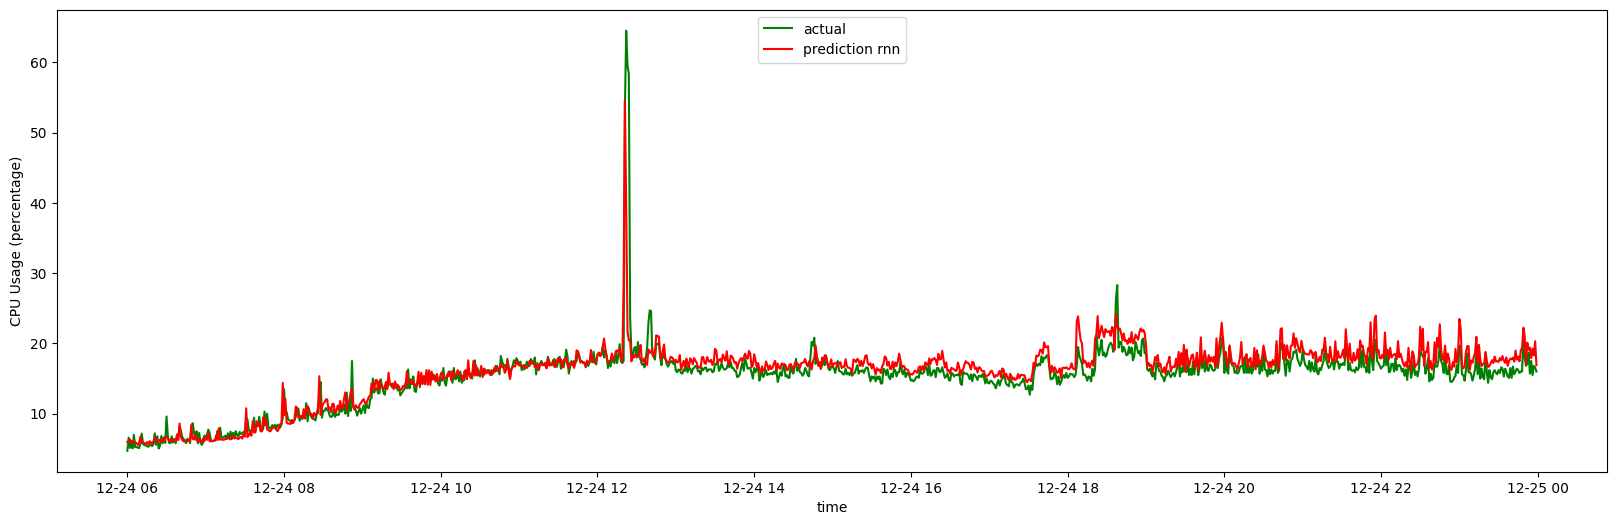

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(pd.to_datetime(data["TIME"])[9000:], Y_test, color='green', label='actual')
plt.plot(pd.to_datetime(data["TIME"])[9000:], predicted_cpu_usage, color='red', label='prediction rnn')
plt.xlabel('time')
plt.ylabel('CPU Usage (percentage)')
plt.legend(loc='upper center')
plt.show()
plt.rcdefaults()  # Reset the default settings including figure size

#RNN Model with normalization

In [ ]:
scaler = preprocessing.StandardScaler()
normalized_X = scaler.fit_transform(X)

In [ ]:
from tensorflow.keras.layers import SimpleRNN

# Assuming x and y are already defined and preprocessed
# x should be shaped as (num_samples, sequence_length, num_features)
# y should be shaped as (num_samples, num_features)

# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
X_train, X_test, Y_train, Y_test =normalized_X[:9000], normalized_X[9000:], Y[:9000], Y[9000:]

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(32, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(32, activation='relu'))
model.add(Dense(1))

model.summary()

# Define a ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint("best_rnn_normalized_model.h5", monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Compile the model
model.compile(optimizer=Adam(0.001), loss='mse')

# Fit the model
model.fit(X_train.astype('float32'), Y_train.astype('float32'), epochs=100, batch_size=16, validation_split=0.1, verbose=1, callbacks=[checkpoint])

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 4, 32)             1088      
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_125 (Dense)           (None, 1)                 33        
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
494/507 [============================>.] - ETA: 0s - loss: 14.5880
Epoch 1: val_loss improved from inf to 50.62829, saving model to best_rnn_normalized_model.h5
507/507 [==============================] - 4s 4ms/step - loss: 14.2522 - val_loss: 50.6283
Epoch 2/100
 45/507

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


503/507 [============================>.] - ETA: 0s - loss: 0.9642
Epoch 2: val_loss did not improve from 50.62829
507/507 [==============================] - 2s 4ms/step - loss: 0.9620 - val_loss: 53.8993
Epoch 3/100
507/507 [==============================] - ETA: 0s - loss: 0.9020
Epoch 3: val_loss did not improve from 50.62829
507/507 [==============================] - 2s 5ms/step - loss: 0.9020 - val_loss: 50.6613
Epoch 4/100
503/507 [============================>.] - ETA: 0s - loss: 0.9037
Epoch 4: val_loss improved from 50.62829 to 49.20349, saving model to best_rnn_normalized_model.h5
507/507 [==============================] - 3s 5ms/step - loss: 0.9064 - val_loss: 49.2035
Epoch 5/100
507/507 [==============================] - ETA: 0s - loss: 0.8434
Epoch 5: val_loss did not improve from 49.20349
507/507 [==============================] - 2s 4ms/step - loss: 0.8434 - val_loss: 53.4741
Epoch 6/100
501/507 [============================>.] - ETA: 0s - loss: 0.8384
Epoch 6: val_loss d

In [ ]:
best_model = load_model("best_rnn_normalized_model.h5")

predicted_cpu_usage = best_model.predict(X_test.astype('float32'))


mse = metrics.mean_squared_error(Y_test, predicted_cpu_usage)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) Score
r2 = metrics.r2_score(Y_test, predicted_cpu_usage)
print("R-squared (R2) Score:", r2)


# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(Y_test, predicted_cpu_usage)
print("Mean Absolute Error (MAE):", mae)


print(Y_test[:8])
print(predicted_cpu_usage[:8])

34/34 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 7.677495441805405
Root Mean Squared Error (RMSE): 2.7708293779670745
R-squared (R2) Score: 0.6163723795831927
Mean Absolute Error (MAE): 1.7594362325138515
[4.73 6.58 5.12 6.12 5.06 6.99 5.24 5.24]
[[6.745912 ]
 [6.7372594]
 [7.0062556]
 [6.69341  ]
 [6.708727 ]
 [6.800306 ]
 [6.7326236]
 [6.681644 ]]


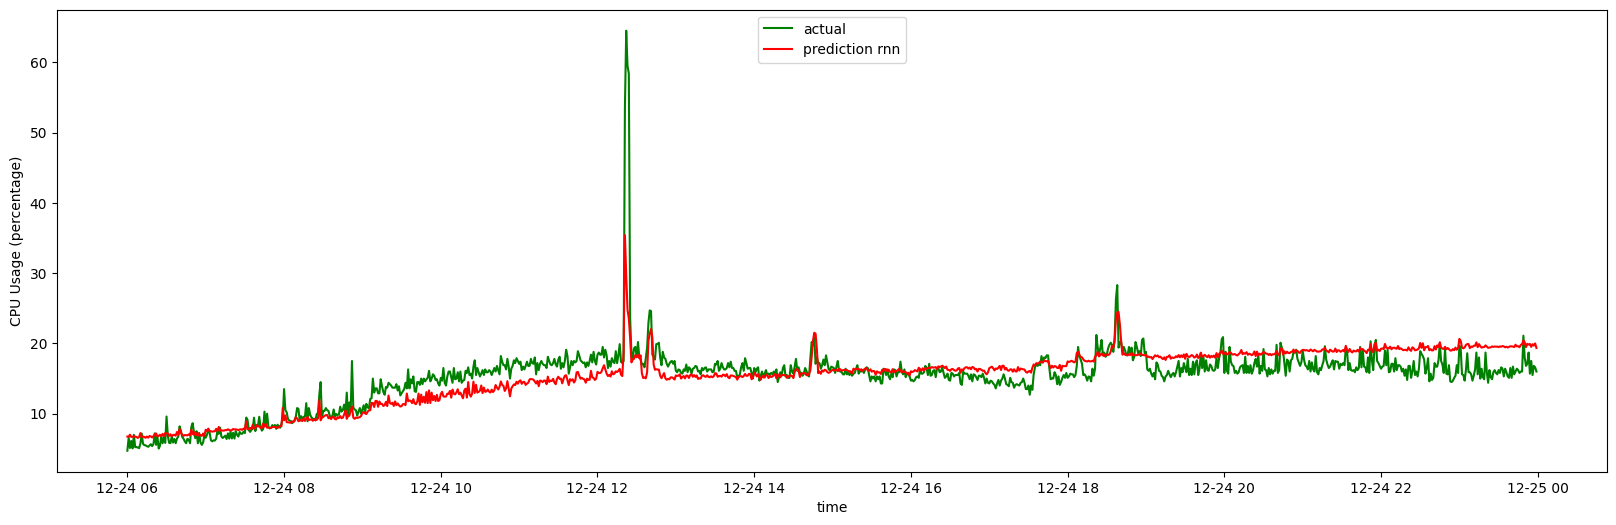

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(pd.to_datetime(data["TIME"])[9000:], Y_test, color='green', label='actual')
plt.plot(pd.to_datetime(data["TIME"])[9000:], predicted_cpu_usage, color='red', label='prediction rnn')
plt.xlabel('time')
plt.ylabel('CPU Usage (percentage)')
plt.legend(loc='upper center')
plt.show()
plt.rcdefaults()  # Reset the default settings including figure size

#RNN with Markov

In [ ]:
from tensorflow.keras.layers import SimpleRNN

# Assuming x and y are already defined and preprocessed
# x should be shaped as (num_samples, sequence_length, num_features)
# y should be shaped as (num_samples, num_features)

# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
X_train, X_test, Y_train, Y_test =X_with_markov[:9000], X_with_markov[9000:], Y[:9000], Y[9000:]

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(32, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(32, activation='relu'))
model.add(Dense(1))

model.summary()

# Define a ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint("best_rnn_markov_model.h5", monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Compile the model
model.compile(optimizer=Adam(0.001), loss='mse')

# Fit the model
model.fit(X_train.astype('float32'), Y_train.astype('float32'), epochs=100, batch_size=16, validation_split=0.1, verbose=1, callbacks=[checkpoint])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 7, 32)             1088      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
507/507 [==============================] - ETA: 0s - loss: 3.7312
Epoch 1: val_loss improved from inf to 35.68297, saving model to best_rnn_markov_model.h5
507/507 [==============================] - 5s 6ms/step - loss: 3.7312 - val_loss: 35.6830
Epoch 2/100
 34/507 [=>...

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


505/507 [============================>.] - ETA: 0s - loss: 1.2841
Epoch 2: val_loss improved from 35.68297 to 29.63456, saving model to best_rnn_markov_model.h5
507/507 [==============================] - 3s 6ms/step - loss: 1.2834 - val_loss: 29.6346
Epoch 3/100
498/507 [============================>.] - ETA: 0s - loss: 1.2499
Epoch 3: val_loss did not improve from 29.63456
507/507 [==============================] - 3s 7ms/step - loss: 1.2407 - val_loss: 39.6721
Epoch 4/100
501/507 [============================>.] - ETA: 0s - loss: 1.3197
Epoch 4: val_loss did not improve from 29.63456
507/507 [==============================] - 2s 5ms/step - loss: 1.3107 - val_loss: 35.2392
Epoch 5/100
502/507 [============================>.] - ETA: 0s - loss: 1.5684
Epoch 5: val_loss did not improve from 29.63456
507/507 [==============================] - 3s 5ms/step - loss: 1.5629 - val_loss: 79.6201
Epoch 6/100
504/507 [============================>.] - ETA: 0s - loss: 1.1325
Epoch 6: val_loss did n

In [ ]:
best_model = load_model("best_rnn_markov_model.h5")

predicted_cpu_usage = best_model.predict(X_test.astype('float32'))


mse = metrics.mean_squared_error(Y_test, predicted_cpu_usage)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) Score
r2 = metrics.r2_score(Y_test, predicted_cpu_usage)
print("R-squared (R2) Score:", r2)


# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(Y_test, predicted_cpu_usage)
print("Mean Absolute Error (MAE):", mae)


print(Y_test[:8])
print(predicted_cpu_usage[:8])

34/34 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 5.435401296010511
Root Mean Squared Error (RMSE): 2.3313947104706467
R-squared (R2) Score: 0.7284049100381356
Mean Absolute Error (MAE): 1.1277827884532787
[4.73 6.58 5.12 6.12 5.06 6.99 5.24 5.24]
[[4.3224363]
 [4.4061766]
 [4.765911 ]
 [4.2115593]
 [4.224745 ]
 [4.4545474]
 [4.26922  ]
 [4.1613073]]


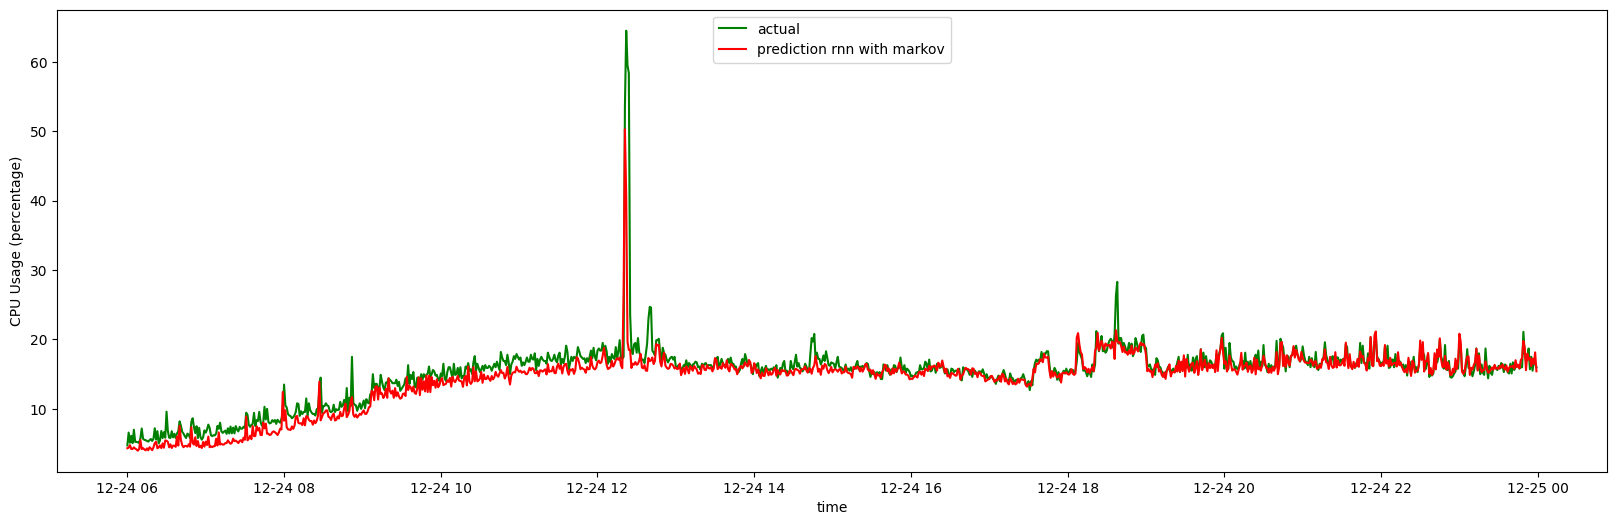

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(pd.to_datetime(data["TIME"])[9000:], Y_test, color='green', label='actual')
plt.plot(pd.to_datetime(data["TIME"])[9000:], predicted_cpu_usage, color='red', label='prediction rnn with markov')
plt.xlabel('time')
plt.ylabel('CPU Usage (percentage)')
plt.legend(loc='upper center')
plt.show()
plt.rcdefaults()  # Reset the default settings including figure size